In [2]:
#Import relevant libraries
import pandas as pd
import polars as pl 
import matplotlib.pyplot as plt
from numpy import NaN
import seaborn as sns
import numpy as np
sns.set()


Our chosen dataset is the bank marketing dataset we used in our first EDA assignment 

In [4]:
#Load the dataset
bank_data = polars_train_df = pl.read_csv("/Users/yasminesarraj/Documents/GitHub/MLOPS-assignments/Assignment_2/bank_marketing.csv",has_header = True, sep = ';',ignore_errors=True)
bank_data.head(5)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
i64,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,f64,f64,f64,f64,i64,str
56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


Basic EDA: Lookiong at the shape of the data, types and the missing values. Our goal is to filter data to only relevant observations.

In [5]:
bank_data.shape

(41188, 21)

In [6]:
bank_data.dtypes

[polars.datatypes.Int64,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Int64,
 polars.datatypes.Int64,
 polars.datatypes.Int64,
 polars.datatypes.Int64,
 polars.datatypes.Utf8,
 polars.datatypes.Float64,
 polars.datatypes.Float64,
 polars.datatypes.Float64,
 polars.datatypes.Float64,
 polars.datatypes.Int64,
 polars.datatypes.Utf8]

In [7]:
bank_data.columns  

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [8]:
print('job', bank_data['job'].n_unique())
print('marital', bank_data['marital'].n_unique())
print('education', bank_data['education'].n_unique())
print('housing', bank_data['education'].n_unique())
print('loan', bank_data['loan'].n_unique())



job 12
marital 4
education 8
housing 8
loan 3


In [9]:
bank_data.null_count() #No missings are existing here

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33425,0


Aggregate the data to obtain summary statistics and metrics
 For example, you can calculate the mean, median, or mode of certain variables to gain a better understanding of the data.

In [10]:
bank_data.describe()

describe,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
str,f64,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str
"""count""",41188.0,"""41188""","""41188""","""41188""","""41188""","""41188""","""41188""","""41188""","""41188""","""41188""",41188.0,41188.0,41188.0,41188.0,"""41188""",41188.0,41188.0,41188.0,41188.0,41188.0,"""41188"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,33425.0,"""0"""
"""mean""",40.02406,null,null,null,null,null,null,null,null,null,258.28501,2.567593,962.475454,0.172963,null,0.081886,93.575664,-40.5026,3.621291,5191.0,null
"""std""",10.42125,null,null,null,null,null,null,null,null,null,259.279249,2.770014,186.910907,0.494901,null,1.57096,0.57884,4.628198,1.734447,0.0,null
"""min""",17.0,"""admin.""","""divorced""","""basic.4y""","""no""","""no""","""no""","""cellular""","""apr""","""fri""",0.0,1.0,0.0,0.0,"""failure""",-3.4,92.201,-50.8,0.634,5191.0,"""no"""
"""max""",98.0,"""unknown""","""unknown""","""unknown""","""yes""","""yes""","""yes""","""telephone""","""sep""","""wed""",4918.0,56.0,999.0,7.0,"""success""",1.4,94.767,-26.9,5.045,5191.0,"""yes"""
"""median""",38.0,null,null,null,null,null,null,null,null,null,180.0,2.0,999.0,0.0,null,1.1,93.749,-41.8,4.857,5191.0,null


In [11]:
#After inspecting the data, we see that we have a lot of "uknown" in the default variable. This variable explain
#whether a client has credit in default, and we will not focus on such info since there are so many unknown.

#We drop this column
bank_data2 = bank_data.drop(["default","nr.employed"])
bank_data2.head(5)


age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
i64,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,f64,f64,f64,f64,str
56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,"""no"""
57,"""services""","""married""","""high.school""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,"""no"""
37,"""services""","""married""","""high.school""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,"""no"""
40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,"""no"""
56,"""services""","""married""","""high.school""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,"""no"""


In [12]:
#REMOVE THOSE UNKOWNS

# Replace "unknown" values with None for each column
def replace_unknown_with_none(value):
    return None if value == 'unknown' else value

# Replace "unknown" values with None for each column
for col in bank_data2.columns:
   
    bank_data2 = bank_data2.with_column(bank_data2[col].apply(replace_unknown_with_none))


In [13]:
bank_data_clean=bank_data2.drop_nulls()

print(f'We reduced the dataset by dropping the missings by: {round((len(bank_data2)-len(bank_data_clean))/len(bank_data2)*100, 3)} %.')

We reduced the dataset by dropping the missings by: 7.145 %.


In [14]:
bank_data_clean.describe()

describe,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
str,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,str
"""count""",38245.0,"""38245""","""38245""","""38245""","""38245""","""38245""","""38245""","""38245""","""38245""",38245.0,38245.0,38245.0,38245.0,"""38245""",38245.0,38245.0,38245.0,38245.0,"""38245"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",39.860871,null,null,null,null,null,null,null,null,258.207583,2.566662,963.531651,0.170009,null,0.082861,93.570313,-40.541164,3.623298,null
"""std""",10.289488,null,null,null,null,null,null,null,null,259.792638,2.767473,184.295254,0.487169,null,1.565945,0.576367,4.6232,1.730226,null
"""min""",17.0,"""admin.""","""divorced""","""basic.4y""","""no""","""no""","""cellular""","""apr""","""fri""",0.0,1.0,0.0,0.0,"""failure""",-3.4,92.201,-50.8,0.634,"""no"""
"""max""",98.0,"""unemployed""","""single""","""university.deg...","""yes""","""yes""","""telephone""","""sep""","""wed""",4918.0,43.0,999.0,7.0,"""success""",1.4,94.767,-26.9,5.045,"""yes"""
"""median""",38.0,null,null,null,null,null,null,null,null,180.0,2.0,999.0,0.0,null,1.1,93.444,-41.8,4.857,null


Filter data to only relevant observations (drop.na + groupby)

Visualize the data using either Apache Spark’s built-in plotting library or any other visualization tools of your choice. You can plot a histogram, scatter plot, line plot, or any other types of charts that are relevant to your dataset. This will help you to identify trends and patterns in the data and gain insights into the underlying relationships between different variables.

shape: (11, 2)
┌───────────────┬───────┐
│ job           ┆ count │
│ ---           ┆ ---   │
│ str           ┆ u32   │
╞═══════════════╪═══════╡
│ unemployed    ┆ 963   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ self-employed ┆ 1349  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ management    ┆ 2728  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ retired       ┆ 1577  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ ...           ┆ ...   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ admin.        ┆ 9937  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ student       ┆ 688   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ blue-collar   ┆ 8560  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ entrepreneur  ┆ 1360  │
└───────────────┴───────┘
shape: (3, 2)
┌──────────┬───────┐
│ marital  ┆ count │
│ ---      ┆ ---   │
│ str      ┆ u32   │
╞══════════╪═══════╡
│ single   ┆ 10760 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ married  ┆ 23183 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ divorced ┆ 4302  │
└──────────┴───────┘
shape: (7, 2)
┌─────────────────────┬───────┐
│ education           ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │


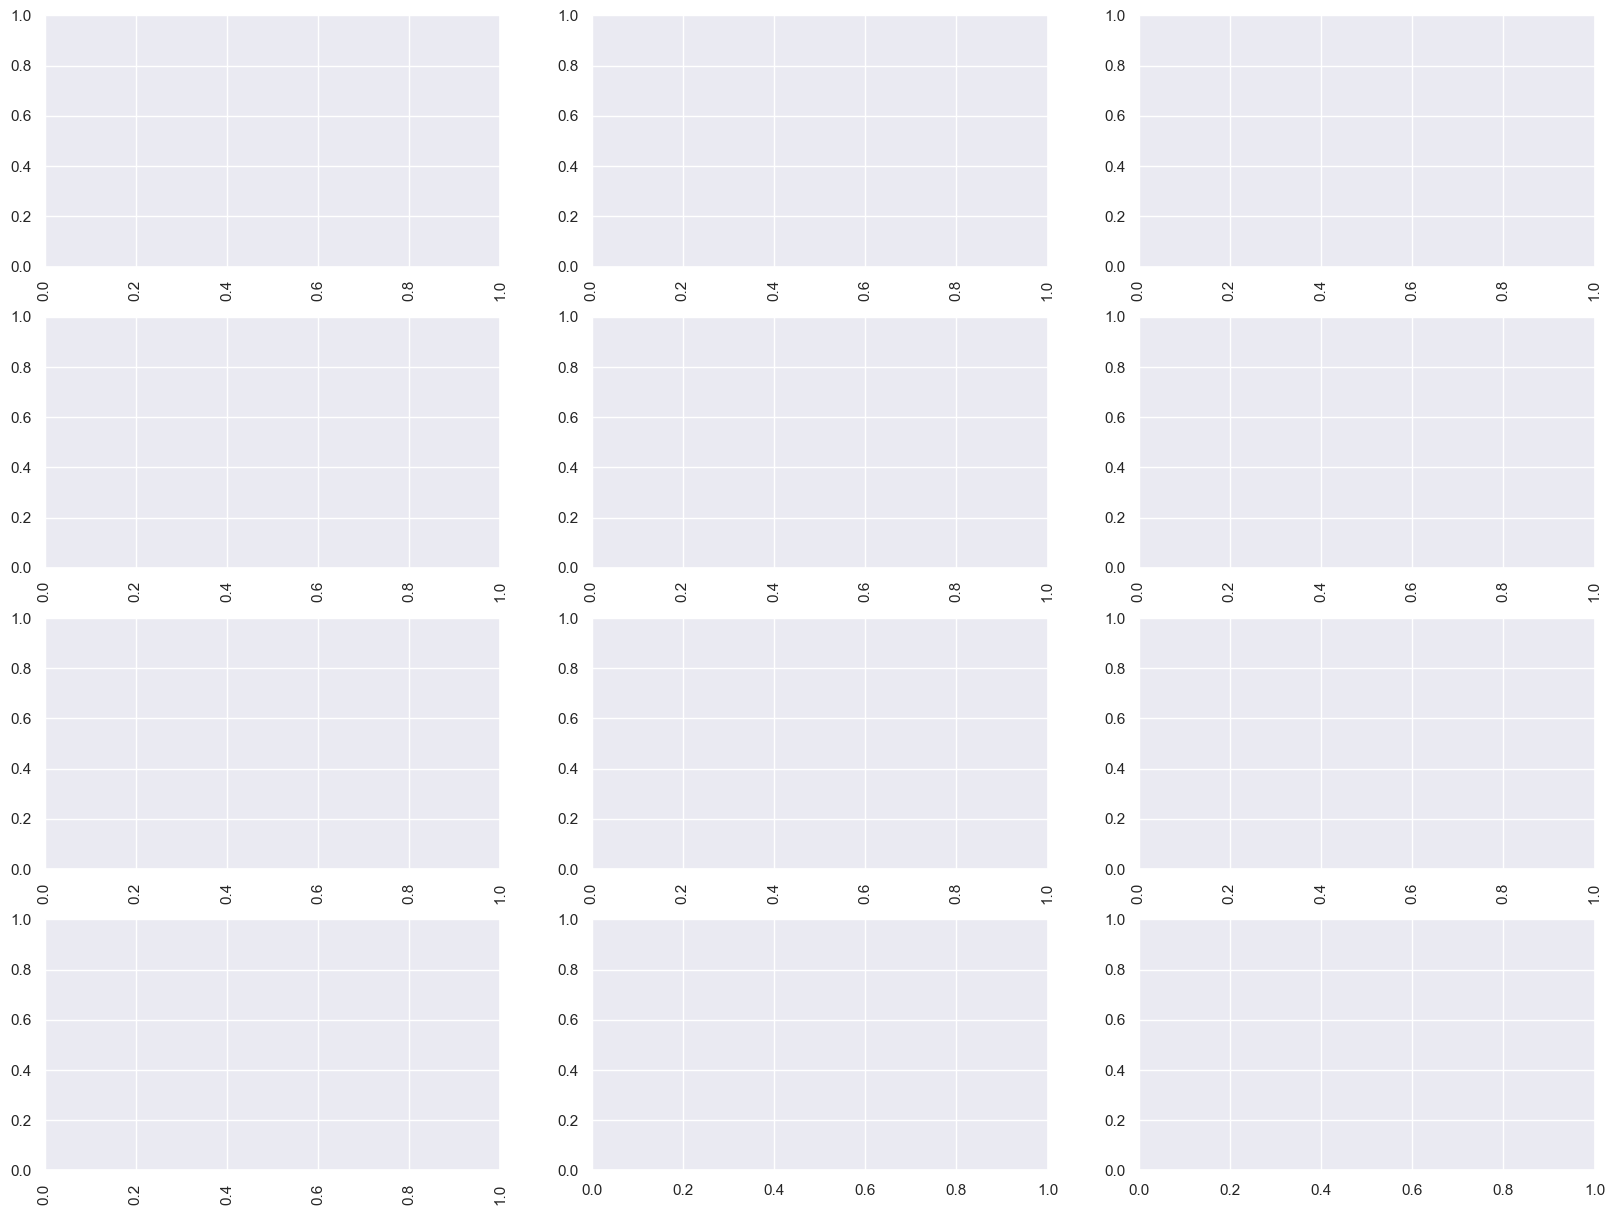

In [24]:
#Correct that shit
cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month','poutcome', 'day_of_week', "y"]

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank_data_clean.groupby(cat_column).agg([pl.count(cat_column).alias('count')])
    print(value_counts)
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    #axs[trace_x, trace_y].bar(x_pos, value_counts.sum, tick_label = value_counts._pos_idx)
    
    #axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()
